# <center> Machine Learning Programming Exercise 5:</center> 
# <center> <ins>Supervised classification </ins></center> 

| <font size=6,font color='red'>Monôme / binôme</font> | <font size=6,font color='red'>Noms</font> | <font size=6,font color='red'>Prénoms</font>   |
|:-------------:     |:-----------   |:------  |
| monôme/binôme 1  | <span style="color:red">Goux--Gateau</span> | <span style="color:red">Adam</span>     |


## 1. Objectifs


Nous allons dans ce TP classer automatiquement des patchs extraits d'images sonar (cf. figure ci-dessous) en types de fond marin (roches, sables, vases, rides de sable verticales et à 45°, [Posidonie](https://fr.wikipedia.org/wiki/Posidonia_oceanica)).

Quelques exemples de patchs d'image sonar de fond marin:

<img src="https://drive.google.com/uc?export=view&id=1cS7gN2XAYBMmcmyhUjmtQRDlL44_wERM" style="width:600px;height:400px ;" />

L'objectif est d'écrire un ou plusieurs scripts permettant de mettre en oeuvre un système basé sur différentes approches supervisées de machine learning. Ces scripts devront ainsi suivre la chaîne générale décrite en cours (à l'exception de la phase de captation; cf. figure ci-dessous ) :
* prétraitements
* extraction des descripteurs
* apprentissage d'un modèle de classement
* classement des patchs
* évaluation du classifieur appris
* comparaison et analyse des performances de différents classifieurs

<img src="https://drive.google.com/uc?export=view&id=1yz-HuFs3zn7Q_AwXflOqdFFjyEAocf1s" />

Le TP est globalement organisé de la manière suivante:

**Données**

Il s'agira d'entraîner les classifieurs à partir de descripteurs extraits grâce à un algorithme performant d'analyse de textures appelé [scattering operator](https://www.di.ens.fr/data/scattering) (le fonctionnement exact n'est pas au programme mais il s'apparente à des bancs de filtres (succession de filtres) ; à chaque niveau un ou plusieurs descripteurs sont calculés). 
 
**Prétraitements**

Aucun autre prétraitement ne sera réalisé. 

**Ensembles de données**

Les deux ensembles de données (apprentissage et test) seront composés de 2/3 et 1/3 de la base totale d'images. 

**Algorithmes** 

Concernant les algorithmes supervisés de machine learning, l'objectif est de découvrir le package python [scikit-learn](http://scikit-learn.org/stable/user_guide.html) qui vous permettra d'utiliser les algorithmes de [régression logistique](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression), [réseaux de neurones](https://scikit-learn.org/stable/modules/neural_networks_supervised.html), [random forests](https://scikit-learn.org/stable/modules/ensemble.html#forest) et [svm](https://scikit-learn.org/stable/modules/svm.html#svm-classification).


**Travail demandé**

<span style="color:red">**Dans cet exercice, il vous est demandé de fournir un seul rapport regroupant les réponses aux questions, vos analyses et vos codes. Ce rapport pourra prendre la forme d'un jupyter notebook ou d'un pdf. Il est de plus conseillé de faire tourner les codes sur [google colab](https://colab.research.google.com/?hl=fr) si votre machine manque de puissance (dans ce cas un jupyter notebook est nécessaire). Il est également conseillé de répondre aux questions par des phrases pour obtenir la totalité des points**.</span>



## Fichiers inclus dans le starter code pour cette séance
* **seafloorClassification_data.npz** - fichier contenant les données nécessaires



# 2. Découverte de la base de patchs

## 2.1 Imports des packages python


In [34]:
# on supprime les warnings pénibles de scikit-learn
def warn(*args, **kwargs):
    pass


import warnings

warnings.warn = warn

# numpy
import numpy as np

# links with google drive and colab
import sys

IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    from google.colab import drive

    drive.mount('/content/gdrive')
    import sys

    code_folder = '/content/gdrive/My Drive/Colab Notebooks/ex06_supervised_seabedClassification/'
    sys.path.append(code_folder)
    # !ls "/content/gdrive/My Drive/Colab Notebooks/ex06_supervised_seabedClassification"
    %cd "$code_folder"
    !ls "$code_folder"

## 2.2 Chargement et examen des données

**Utiliser les lignes de code suivantes permettant de charger les données comprises dans le fichier __seafloorClassification_data.npz__**

In [35]:
# ---------------------------------------------------------------------------------------------------------------
# LOAD Data, Features, Labels
# ---------------------------------------------------------------------------------------------------------------

tmp = np.load('seafloorClassification_data.npz',allow_pickle=True)

image_values = np.float64(tmp['image_values']) # images sonar
label_names = tmp['label_names'] # types de fond marin
feature_values = tmp['feature_values'] # features extraits avec le scaterring operator
instance_nb = tmp['instance_nb'] # nb d'images sonar
feature_nb = tmp['feature_nb'] # nb de features

##### **<ins>Question 2.2.1:</ins> Ecrire du code permettant d'afficher quelques patchs (comme la première image de ce notebook, chaque patch a une taille de 200x200)**

**_Your commented code below_**

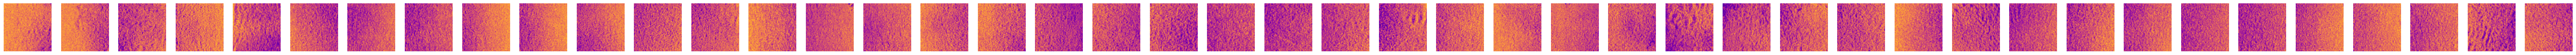

In [36]:
import matplotlib.pyplot as plt

patch_size = 200    # Quite explicit
patches = []        # Create an empty list to store image patches

# Loop through a range based on the number of rows in the image data
for i in range(int(image_values.shape[0] / 8)):
    patch = image_values[i].reshape(patch_size, patch_size)      # Extract a patch from the image and reshape it to the specified patch size
    patches.append(patch)                                        # Append the patch to the list

fig, axes = plt.subplots(1, len(patches), figsize=(len(patches) * 2, 2))        # Display the patch

for i in range(len(patches)):                    # Loop through the patches and display them on separate subplots
    axes[i].imshow(patches[i], cmap='plasma')
    axes[i].axis('off')

plt.show()



**<ins>Question 2.2.2: </ins> Ecrire du code permettant de donner quelques statistiques de chaque descripteur extrait des images grâce au scattering operator.**

**_Your commented code below_**

In [37]:
dict_stats= {'Mean': np.mean(feature_values, axis=0), 'Standard deviation': np.std(feature_values, axis=0),
             'Median': np.median(feature_values, axis=0)}
print(dict_stats)

{'Mean': array([1976.76472831,   30.60533916,   21.48694116,   30.8760796 ,
         43.3981078 ]), 'Standard deviation': array([178.55727141,   9.98416953,  13.39632074,  11.02757781,
        10.25910852]), 'Median': array([1940.99690395,   28.2111773 ,   15.35964894,   27.61810908,
         42.35776873])}


**<ins>Question 2.2.3: commentez ces statistiques</ins>**

**_The mean and the median are quite close, which means that there is not too much strange values. The standard deviation seems elevated : the values are well dispersed._**


## 3. Traitements

## 3.1 Normalisation des descripteurs

**<ins>Question 3.1.1:</ins> Écrire des lignes de code permettant de [centrer et réduire](https://scikit-learn.org/stable/modules/preprocessing.html) les données si besoin. Proposez et mettez en oeuvre un procédé pour vérifier cette normalisation.**


**_Your commented code below_**

In [38]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(feature_values)
data_scaled = scaler.transform(feature_values)

**<ins>Question 3.1.2</ins>: Pourquoi doit-on faire cette normalisation?**

**_The different parameters should have the same "weight". If the values of one are more elevated than an other one, it will matter more and that should not be the case, hence the normalisation_**


## 3.2 Séparation des données en ensembles

**<ins>Question 3.2.1:</ins> Écrire des lignes de code permettant de [créer deux ensembles](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split): un pour l'apprentissage et un pour le test en proportions 2/3-1/3.**


**_Your commented code below_**

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_scaled, label_names, test_size=0.333, random_state=42)         # Creating the 2 sets, 42 because 42

**<ins>Question 3.2.2:</ins> Pourquoi doit-on faire cela?**

**_This step enables us to control the quality of the learning phase. Our test data are used to evaluate the accuradcy of the parameters obtained._**



### 3.3 Gestion des labels

**<ins>Question 3.2.3:</ins> Écrire des lignes de code permettant de disposer des labels pour chaque ensemble de données dans différents [codages](https://scikit-learn.org/stable/modules/preprocessing_targets.html) (noms vers indices, indices vers [one-hot-encoding](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features), noms vers one-hot-encoding).**


**_Your commented code below_**

In [40]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Initialize the LabelEncoder to convert class names to class indices
label_encoder = LabelEncoder()

# Convert class names to class indices for training and testing sets
y_train_indices = label_encoder.fit_transform(y_train)
y_test_indices = label_encoder.transform(y_test)

onehot_encoder = OneHotEncoder(sparse=False)                                    # Initialize the OneHotEncoder to convert class indices to one-hot encoding
y_train_onehot = onehot_encoder.fit_transform(y_train_indices.reshape(-1, 1))   # Convert class indices to one-hot encoding for training and testing sets
y_test_onehot = onehot_encoder.transform(y_test_indices.reshape(-1, 1))

# Alternatively, you can directly convert class names to one-hot encoding without going through indices
# Convert class names to one-hot encoding for training and testing sets

y_train_onehot_names = onehot_encoder.transform(label_encoder.transform(y_train).reshape(-1, 1))
y_test_onehot_names = onehot_encoder.transform(label_encoder.transform(y_test).reshape(-1, 1))



**<ins>Question 3.2.4:</ins> Etudiez la répartition du nombre de données (d'images) pour chaque <ins>type de fonds marins et pour chaque ensemble de données</ins>. Est-ce important? Pourquoi?**

**_Your commented code below_**


In [41]:
def calculate_class_distribution(y_indices):
    class_counts = [0] * 6  # Assuming there are six classes (0 to 5)

    # Count occurrences of each class
    for i in y_indices:
        class_counts[i] += 1

    class_distribution = [100 * count / len(y_indices) for count in class_counts]      # Calculate class distribution percentages
    return class_distribution

repartition_train = calculate_class_distribution(y_train_indices)  # Calculate and print class distribution percentages for the training dataset
print("Training dataset class distribution:", repartition_train)

repartition_test = calculate_class_distribution(y_test_indices)  # Calculate and print class distribution percentages for the test dataset
print("Test dataset class distribution:", repartition_test)


Training dataset class distribution: [16.25, 15.0, 16.25, 17.916666666666668, 15.833333333333334, 18.75]
Test dataset class distribution: [17.5, 20.0, 17.5, 14.166666666666666, 18.333333333333332, 12.5]


**The study of distribution in each dataset is extremely important. Indeed, if a type is not adequately represented, there will be a prediction problem because the model hasn't encountered that type enough times. Conversely, if it is overrepresented, the model will tend to associate too much data with that type. In other words, we do this to prevent bias towards certain types of underwater environments..**


## 4. Approche supervisée à partir des descripteurs du scattering operator

## 4.1 Apprentissage des classifieurs


**<ins>Question 4.1.1:</ins> Faire la liste expliquée des hyper-paramètres (paramètre uniquement lié à l'algorithme d'apprentissage) les plus importants des algorithmes: [régression logistique](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression), [réseaux de neurones](https://scikit-learn.org/stable/modules/neural_networks_supervised.html), [random forests](https://scikit-learn.org/stable/modules/ensemble.html#forest) et [svm](https://scikit-learn.org/stable/modules/svm.html#svm-classification).Vous vous concentrerez sur les hyperparamètres que nous avons rencontré précédemment (cours et TPs).**

The list of hyperparameters for logistic regression includes:

   * Regularization parameter: It helps prevent underfitting and overfitting issues.
   * Learning rate: It ensures a certain convergence accuracy. If it is too high, we might overshoot the minimum. Conversely, if it is not high
    enough, we may not reach the minimum.
   * Number of iterations.

The list of hyperparameters for neural networks includes:

* Network size (number of layers and number of neurons per layer).
* Regularization parameter.
* Number of iterations.
* Activation function.
* Preactivation.

The list of hyperparameters for random forest includes:

* Learning rate.
* Number of decision trees.
* Tree depth.
* Minimum samples per leaf.

The list of hyperparameters for SVM includes:

* Kernel (along with its parameters).
* Parameter C (penalty parameter of the error term).

**<ins>Question 4.1.2</ins>: Réalisez l'apprentissage successif des modèles: régression logistique, réseaux de neurones, svm et random forest en utilisant les fonctions du package scikit-learn. Les valeurs des hyper-paramètres seront choisis comme les valeurs par défaut de scikit-learn.**

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

neural_network = MLPClassifier()
neural_network.fit(X_train, y_train)

random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)



RandomForestClassifier()

**<ins>Question 4.1.3</ins>: A l'aide des fonctions fournies, évaluer les modèles appris avec la procédure d'évaluation des performances pour les grands jeux de données en calculant et en affichant la matrice de confusion, puis les [métriques extraites de cette matrice](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html). Commenter.**

**_Your commented code below_**

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report

def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    predictions = model.predict(X_test)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, predictions)

    # Calculate classification report
    metrics = classification_report(y_test, predictions)

    return cm, metrics

# Logistic Regression
logistic_regression = LogisticRegression()
cm_lr, metrics_lr = train_and_evaluate(logistic_regression, X_train, y_train_indices, X_test, y_test_indices)

# Neural Network
neural_network = MLPClassifier()
cm_nn, metrics_nn = train_and_evaluate(neural_network, X_train, y_train_indices, X_test, y_test_indices)

# Random Forest
random_forest = RandomForestClassifier()
cm_rf, metrics_rf = train_and_evaluate(random_forest, X_train, y_train_indices, X_test, y_test_indices)

# Support Vector Machine (SVM)
svm_model = svm.SVC()
cm_svm, metrics_svm = train_and_evaluate(svm_model, X_train, y_train_indices, X_test, y_test_indices)

# Print or use the confusion matrices and metrics as needed



## 4.2 Première évaluation (biaisée) des classifieurs

**<ins>Question 4.2.1</ins>: Le jeu de données étant petit, la procédure précédente n'est pas adaptée. Vous évaluerez les performances par [cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html\#computing-cross-validated-metrics) et reporterez la moyenne et l'écart-type de la métrique `accuracy`. Commenter**

**_Your commented code below_**

In [44]:
from sklearn.model_selection import cross_val_score
models=[logistic_regression,neural_network,random_forest,clf]
scores_list=[]
for model in models:
    scores = cross_val_score(model,feature_values, label_names, cv=5,scoring='accuracy')
    mean=scores.mean()
    std=scores.std()
    scores_list.append((mean,std))
print(scores_list)

[(0.8166666666666667, 0.06538112386633234), (0.6444444444444445, 0.0984446952592742), (0.95, 0.01416394309331329), (0.3944444444444445, 0.03888888888888889)]


The average of the accuracy metric is 0.95277777, and the standard deviation is 0.016666666 for the random forest. Thus, the average accuracy is high, and the standard deviation is low. This means that we are able to generalize correctly to other parts of the database beyond the training set.

We do not observe a similar phenomenon for the other models because the average of the metric is not as high.

## 4.3 Optimisation des hyper-paramètres du modèle

Le jeu de données étant très petit, la valeur des hyper-paramètres doit être fixée de manière optimale en évaluant les modèles par cross validation sur l'ensemble de training.

**<ins>Question 4.3.1</ins>:** Lisez le [tutoriel suivant](https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html) en faisant particulièrement attention à la façon dont est gérée la détermination des hyperparamètres et l'évaluation des performances. Reproduisez cette méthodologie en testant différents nombres de plis (fold):
* pour la **<ins>Régression logistique:</ins>**:
    * C: 0.001, 0.01,0.1,1,10
    * penalty = 'l1', 'l2', 'elasticnet', 'None'

* pour le **<ins>réseau de neurones</ins>:**
    * hidden_layer_sizes: une couche de 100 neurones, 2 couches de 100 neurones, 3 couches de 100 neurones
    * activation: 'logistic', 'tanh', 'relu'
    * alpha: 0.0001, 0.001, 0.01, 0.1, 1, 10

* pour le **<ins>Random Forest</ins>:**
    * n_estimators: 1, 10, 100, 500, 1000
    * max_depth: 5, 10, 20
    * min_samples_leaf: 1, 5, 10

* pour le **<ins>SVM</ins>:**
    * kernel: 'rbf'
    * C: 1e3, 5e3, 1e4, 5e4, 1e5, 1e6
    * gamma: 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1, 0.5


N'hésitez pas à fixer le paramètre `verbose` pour comprendre ce qui est fait.

**_Your commented code below_**

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

def perform_grid_search(model, param_grid, X_train, y_train_indices):
    grid_search = GridSearchCV(model, param_grid, scoring='accuracy')
    grid_search.fit(X_train, y_train_indices)
    return grid_search

# Logistic Regression
tuned_parameters_lr = [
    {"penalty": ['l1', 'l2'], "C": [0.001, 0.01, 0.1, 1, 10]}
]
grid_search_lr = perform_grid_search(LogisticRegression(), tuned_parameters_lr, X_train, y_train_indices)

# Neural Network
tuned_parameters_nn = [
    {
        'hidden_layer_sizes': [(100,), (100, 100), (100, 100, 100)],
        'activation': ['relu', 'tanh', 'logistic'],
        'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
    }
]
grid_search_nn = perform_grid_search(MLPClassifier(), tuned_parameters_nn, X_train, y_train_indices)

# Random Forest
tuned_parameters_rf = [
    {
        'n_estimators': [1, 10, 100, 500, 1000],
        'max_depth': [5, 10, 20],
        'min_samples_leaf': [1, 5, 10],
    }
]
grid_search_rf = perform_grid_search(RandomForestClassifier(), tuned_parameters_rf, X_train, y_train_indices)

# SVM
tuned_parameters_svm = [
    {
        'kernel': ['rbf'],
        'C': [1e3, 5e3, 1e4, 5e4, 1e5, 1e6],
        'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1, 0.5]
    }
]
grid_search_svm = perform_grid_search(SVC(), tuned_parameters_svm, X_train, y_train_indices)

# Access best parameters using grid_search_lr.best_params_, grid_search_nn.best_params_, etc.

**<ins>Question 4.3.2</ins>: Donner la valeur des paramètres optimaux pour chaque classifieur.**

_Your commented code below_

In [52]:
optimal_params= {"logistic regression": grid_search_lr.best_params_, "neural network": grid_search_nn.best_params_,
                 "random forest": grid_search_rf.best_params_, "svm": grid_search_svm.best_params_}
print(optimal_params)

{'logistic regression': {'C': 1, 'penalty': 'l2'}, 'neural network': {'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': (100, 100)}, 'random forest': {'max_depth': 20, 'min_samples_leaf': 5, 'n_estimators': 500}, 'svm': {'C': 1000.0, 'gamma': 0.0001, 'kernel': 'rbf'}}


For logistic regression:

* The best regularization parameter is 10.
* The best type of regularization is L2.

For a neural network:

* The optimal size is 3 layers of 100 neurons each.
* The activation function is ReLU.
* The alpha parameter is 0.01.

For a random forest:

* The best maximum depth is 10.
* The best minimum samples per leaf is 1.
* The optimal number of estimators is 100.

For SVM:

* The best penalty parameter of the error term is 5000.
* The best kernel is rbf (reassuringly, as it is the only one in the list).
* The best gamma is 0.01.

**<ins>Question 4.3.3</ins>: Apprendre le modèle final pour chaque classifieur avec les paramètres optimaux et évaluer leurs performances avec les métriques (precision, recall, f1).**


**_Your commented code below_**

In [ ]:
lr_model = LogisticRegression(**optimal_params["logistic regression"])
nn_model = MLPClassifier(**optimal_params["neural network"])
rf_model = RandomForestClassifier(**optimal_params["random forest"])
svm_model = SVC(**optimal_params["svm"])

lr_model.fit(X_train, y_train_indices)
nn_model.fit(X_train, y_train_indices)
rf_model.fit(X_train, y_train_indices)
svm_model.fit(X_train, y_train_indices)

predictions_lr = lr_model.predict(X_test)
predictions_nn = nn_model.predict(X_test)
predictions_rf = rf_model.predict(X_test)
predictions_svm = svm_model.predict(X_test)

cm_lr=confusion_matrix(y_test_indices, predictions_lr)
metrics_lr=classification_report(y_test_indices, predictions_lr)

cm_nn=confusion_matrix(y_test_indices, predictions_nn)
metrics_nn=classification_report(y_test_indices, predictions_nn)

cm_rf=confusion_matrix(y_test_indices, predictions_rf)
metrics_rf=classification_report(y_test_indices, predictions_rf)

cm_svm=confusion_matrix(y_test_indices, predictions_svm)
metrics_svm=classification_report(y_test_indices, predictions_svm)

print(metrics_lr)
print(metrics_nn)
print(metrics_rf)
print(metrics_svm)


## 4.4 Evaluation optimale pour les petits jeux de données

**<ins>Question 4.4.1</ins>: Les performances espérées par le modèle final sont biaisées car nous avons un petit jeu de données et nous avons évaluées les performances sur des données vues lors de l'apprentissage ou pour fixer les hyperparamètres. La procédure adaptée pour évaluer proprement les performances dans ce cas se nomme validations croisées imbriquées. Le tutoriel [Nested Cross-Validation for Machine Learning with Python](https://machinelearningmastery.com/nested-cross-validation-for-machine-learning-with-python/) décrit cette procédure. Evaluer les performances pour une validation croisée extérieure (outer) de 4 et intérieure (inner) de 3**.


In [48]:
from sklearn.model_selection import KFold
lr_model = LogisticRegression(**best_params["logistic regression"])
nn_model = MLPClassifier(**best_params["neural network"])
rf_model = RandomForestClassifier(**best_params["random forest"])
svm_model = SVC(**best_params["svm"])
models=[lr_model,nn_model,rf_model,svm_model]
cv_outer = KFold(n_splits=4)
cv_inner = KFold(n_splits=3)

outer_scores = []
inner_scores = []

for model in models:
    inner_score = cross_val_score(model, X_train, y_train, cv=cv_inner, scoring='accuracy')
    inner_scores.append((inner_score.mean(), inner_score.std()))

    outer_score = cross_val_score(model, X_train, y_train, cv=cv_outer, scoring='accuracy')
    outer_scores.append((outer_score.mean(), outer_score.std()))

print(inner_scores)
print(outer_scores)

[(0.9041666666666667, 0.03118047822311616), (0.9541666666666666, 0.031180478223116204), (0.9291666666666666, 0.02124591463996991), (0.9416666666666668, 0.04124789556921531)]
[(0.9249999999999999, 0.03435921354681381), (0.9666666666666666, 0.02041241452319317), (0.9375, 0.013819269959814159), (0.95, 0.031180478223116186)]


_Double cliquez ici pour écrire votre réponse ici!_


# 5. Approche supervisée sur données brutes

**<ins>Question 5.1</ins>:** Réalisez l'apprentissage du classifieur random forest en utilisant les fonctions du package scikit-learn sur les valeurs des pixels des images. Pensez vous qu'un autre classifieur donnerait des meilleurs résultats? Analysez les résultats (décrivez et proposez une interprétation de ce qu'il se passe)

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report

# Load and preprocess your data
scaler = preprocessing.StandardScaler().fit(image_values)
data_scaled = scaler.transform(image_values)
X_train, X_test, y_train, y_test = train_test_split(data_scaled, label_names, test_size=0.33, random_state=42)

# Label encoding
label_encoder = LabelEncoder()
y_train_indices = label_encoder.fit_transform(y_train)
y_test_indices = label_encoder.transform(y_test)

# One-hot encoding
onehot_encoder = OneHotEncoder(sparse=False)
y_train_onehot = onehot_encoder.fit_transform(y_train_indices.reshape(-1, 1))
y_test_onehot = onehot_encoder.transform(y_test_indices.reshape(-1, 1))

# Hyperparameter tuning for RandomForestClassifier
tuned_parameters_rf = {
    'n_estimators': [1, 10, 100, 500, 1000],
    'max_depth': [5, 10, 20],
    'min_samples_leaf': [1, 5, 10],
}

# Perform grid search
grid_search_rf = GridSearchCV(RandomForestClassifier(), tuned_parameters_rf, scoring='accuracy', cv=3)
grid_search_rf.fit(X_train, y_train_indices)

# Get the best hyperparameters
best_params_rf = grid_search_rf.best_params_

# Create a RandomForestClassifier with the best hyperparameters
rf_model_bp = RandomForestClassifier(**best_params_rf)

# Fit the model on the training data
rf_model_bp.fit(X_train, y_train_indices)

# Make predictions on the test set
predictions_rf_bp = rf_model_bp.predict(X_test)

# Evaluate the model
cm_rf_bp = confusion_matrix(y_test_indices, predictions_rf_bp)
metrics_rf_bp = classification_report(y_test_indices, predictions_rf_bp)
print(metrics_rf_bp)


**_Your commented code below_**

We notice that the accuracy for a random forest is 0.54, which is quite low. Thus, this indicates that we have not succeeded in generalizing correctly. We have followed a similar approach to the previous one:

* Normalization of descriptors
* Splitting the dataset into training and testing sets
 * Encoding the data
  * Initial evaluation
   * Hyperparameter optimization



# 6. Analyse finale

**<ins>Question 6.1</ins>: Faites une synthèse des résultats obtenus. Dresser en particulier des conclusions en fonction des descripteurs utilisés, des algorithmes utilisés (et leurs caractéristiques) et des prétraitements effectués.**

**_Double cliquez ici pour écrire votre réponse ici!_**


# 7. Diagramme fonctionnel

**<ins>Question 7.1</ins>:** Réalisez un diagramme fonctionnel décrivant le flux des données au travers de différents blocs (représentant des fonctions) tout au long de l'approche supervisée. Ce diagramme devra faire apparaître au minimum: les trois ensembles d'images, les descripteurs, le modèle de machine learning appris, les différents algorithmes d'apprentissage, l'évaluation (mettre une image dans le répertoire courant et dans la cellule ci-dessous remplacer par le nom du fichier)

**_Your image here_** <img src="fichierDiagramme.png" />

**<ins>Question 7.2</ins>:**  Mettez vous dans le cadre d'**un jeu de données de grande taille** et réalisez un autre diagramme fonctionnel répondant à la question précédente.

**_Your image here_** <img src="fichierDiagramme2.png" />